In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import model_selection, datasets

from functools import partial
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.ensemble import AdaBoostClassifier

In [3]:
data = pd.read_csv('geyser.csv')
data['class_num'] = data['class'].apply(lambda value: {'P': 1, 'N': -1}[value])
X_data = preprocessing.MinMaxScaler().fit_transform(data[['x', 'y']].values)
Y_target = data['class_num']

In [4]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X_data, Y_target, test_size = 0.2)

In [9]:
adaBoostClassifier = AdaBoostClassifier(n_estimators=30).fit(train_data, train_labels)

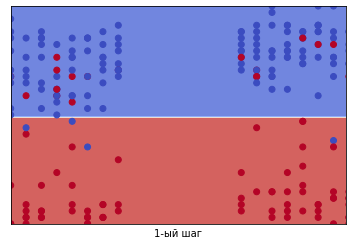

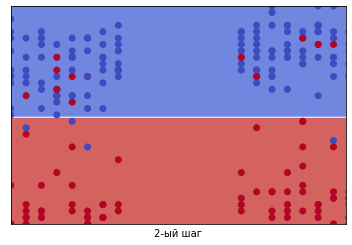

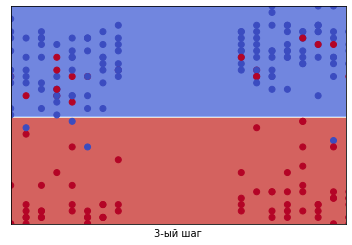

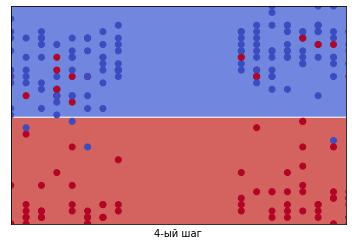

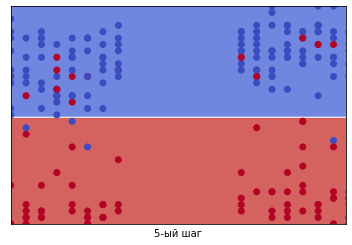

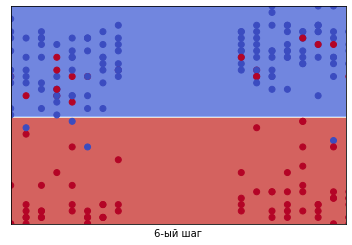

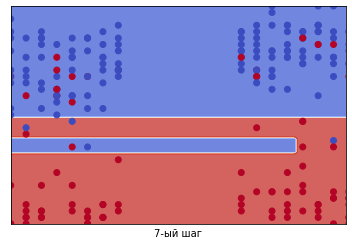

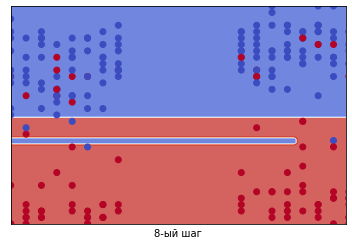

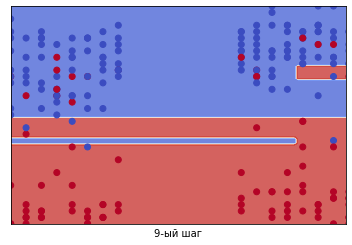

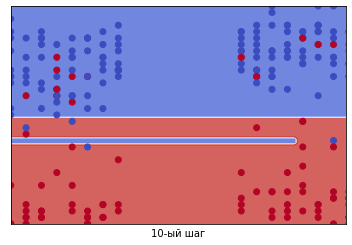

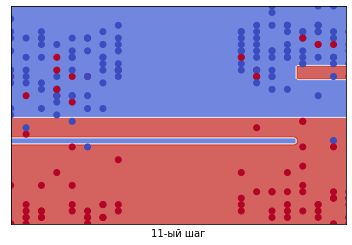

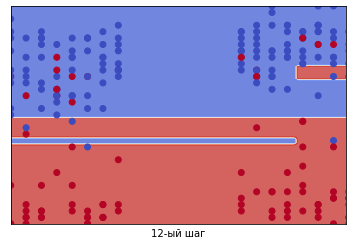

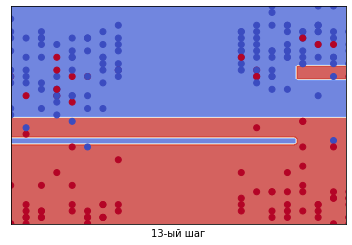

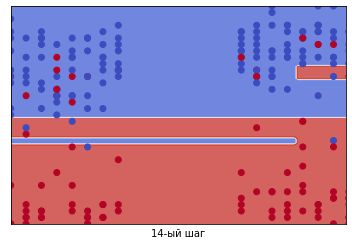

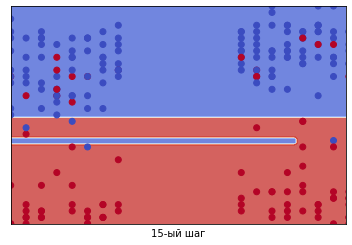

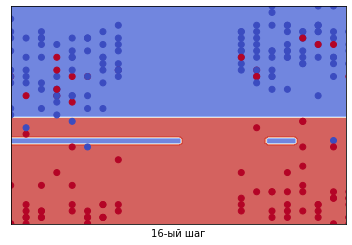

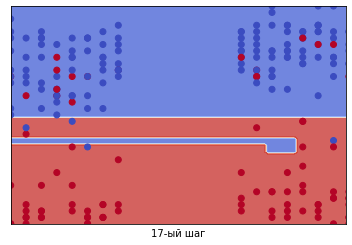

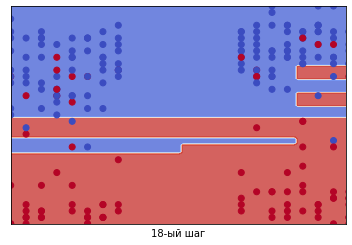

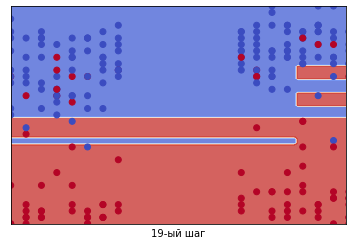

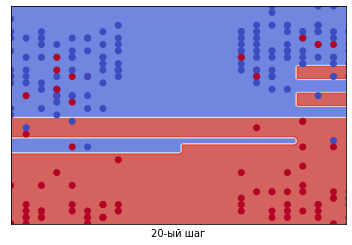

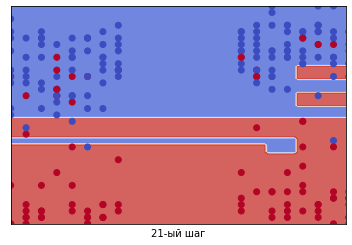

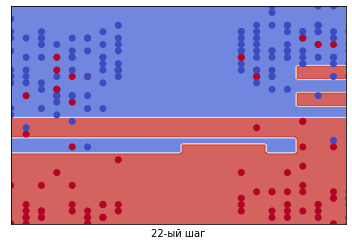

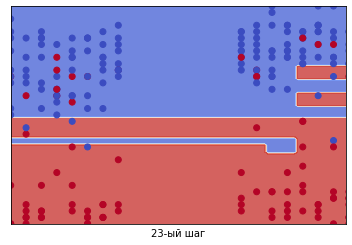

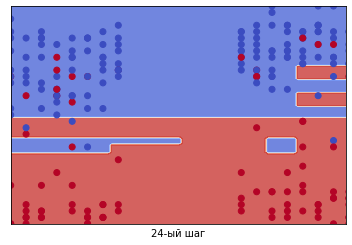

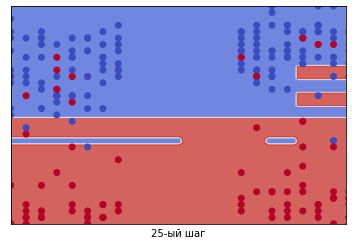

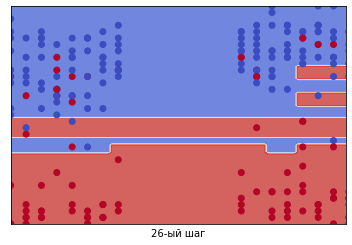

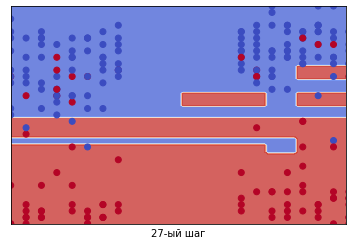

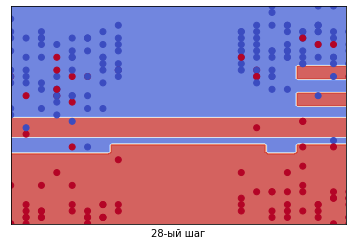

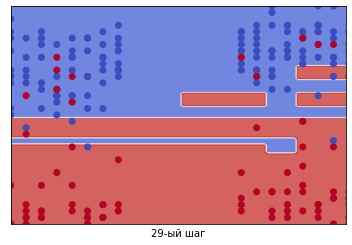

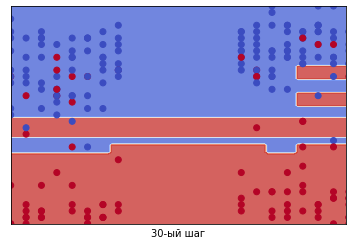

In [10]:
i = 1
h = .01

x_min, x_max = test_data[:, 0].min(), test_data[:, 0].max()
y_min, y_max = test_data[:, 1].min(), test_data[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for arr in list(adaBoostClassifier.staged_predict(np.c_[xx.ravel(), yy.ravel()])):
    
    plt.contourf(xx, yy, arr.reshape(xx.shape), cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=Y_target, cmap=plt.cm.coolwarm)
    plt.xlabel(str(i) + "-ый шаг")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()  
    i = i + 1

In [12]:
len(list(adaBoostClassifier.staged_score(test_data, test_labels)))

30

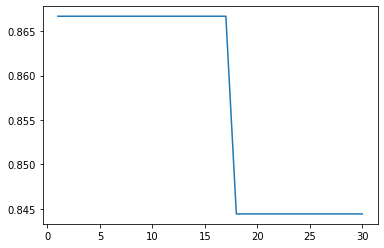

In [13]:
x = np.arange(1, 31)
plt.plot(x, list(adaBoostClassifier.staged_score(test_data, test_labels)))
plt.show()